In [129]:
from ds11mltoolkit import data_processing

In [130]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In [131]:
seed = 42

In [132]:
df, X_train, y_train = data_processing.load_imgs('data/train', 48)

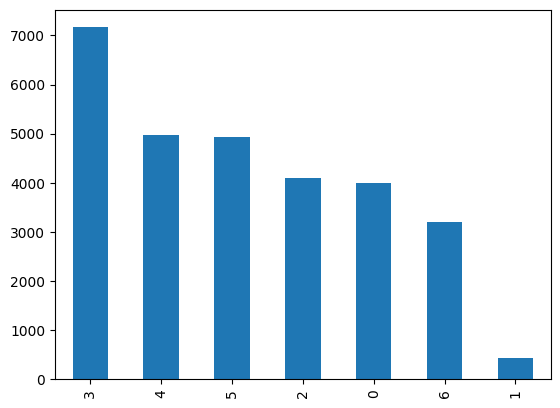

In [133]:
df['category'].value_counts().plot.bar();

In [134]:
datagen = data_processing.ImageDataGen(
    horizontal_flip=True,
    rotation_range=20,
    shear_range=.1,
    zoom_range=.2,
    width_shift_range=.1,
    height_shift_range=.1
)

In [135]:
X_train = np.expand_dims(X_train, axis=-1)

In [136]:
X_gen, y_gen = datagen.gen_from_array(x=X_train, y=y_train, max_image_count=8000)

In [137]:
X_train = X_train / 255.

In [138]:
print(X_train.shape)
print(X_gen.shape)

(28821, 48, 48, 1)
(27282, 48, 48, 1)


In [139]:
X_train_gen = np.concatenate([X_train, X_gen], axis=0)
y_train_gen = np.concatenate([y_train, y_gen], axis=0)

In [140]:
print(y_train_gen.shape)
print(X_train_gen.shape)

(56103,)
(56103, 48, 48, 1)


In [141]:
X_train_gen, y_train_gen = shuffle(X_train_gen, y_train_gen, random_state=seed)

In [142]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(.2),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])

In [143]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [144]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 128)       

In [145]:
earlystop = EarlyStopping(patience=5)
mcheckpoint = ModelCheckpoint('callback_model.h5')

In [146]:
history = model.fit(
    X_train_gen, y_train_gen,
    validation_split=.2,
    epochs=1000,
    batch_size=32,
    callbacks=[earlystop, mcheckpoint]
)

Epoch 1/1000
1312/1403 [===========================>..] - ETA: 6s - loss: 1.8778 - accuracy: 0.2631

KeyboardInterrupt: 